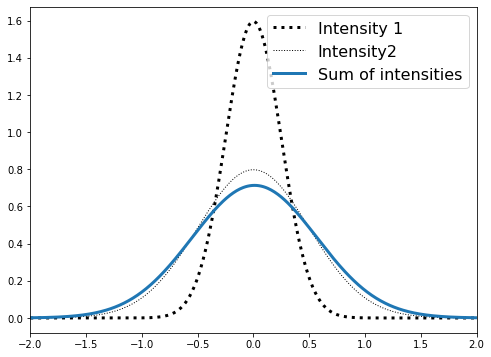

<Figure size 576x432 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import signal

std = 0.25
std2 = 0.5
normal_dist1 = stats.norm(loc=0, scale=std)
normal_dist2 = stats.norm(loc=0, scale=std2)

step = 1e-2
xp1 = np.arange(-2,2,step)

Intensity1_pmf = normal_dist1.pdf(xp1)*step #Intensity1

Intensity2_pmf = normal_dist2.pdf(xp1)*step #Intensity2

c = signal.fftconvolve(Intensity1_pmf,Intensity2_pmf,'same') #Sum of intensity

Intensity1_pdf = Intensity1_pmf/step
Intensity2_pdf = Intensity2_pmf/step
c_pdf = c/step

fig = plt.figure(1, figsize=[8, 6])
ax = plt.gca()
ax.set_xlim([-2, 2])
plt.plot(xp1, Intensity1_pdf, 'k:', linewidth=3,
         label ='Intensity 1')


plt.plot(xp1, Intensity2_pdf, 'k:', linewidth=1,
         label ='Intensity2')

plt.plot(xp1, c_pdf, lw=3,
         label ='Sum of intensities')

plt.legend(loc='upper right',fontsize=16)

fig = plt.figure(2, figsize=[8, 6])


plt.show()


200000
Sum of uniform pmf: 0.9999999999998996
Sum of normal pmf: 1.0000000000023075
Sum of convoluted pmf: 1.0000000000023057
Integration of convoluted pdf: 1.0000000000000002


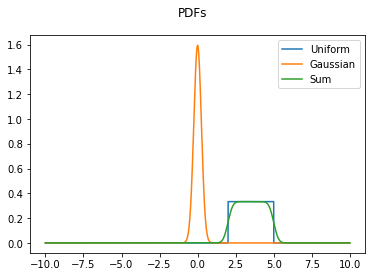

In [47]:
uniform_dist = stats.uniform(loc=2, scale=3)
std = 0.25
normal_dist = stats.norm(loc=0, scale=std)

delta = 1e-4
big_grid = np.arange(-10,10,delta)
print(len(big_grid))

pmf1 = uniform_dist.pdf(big_grid)*delta
print("Sum of uniform pmf: "+str(sum(pmf1)))

pmf2 = normal_dist.pdf(big_grid)*delta
print("Sum of normal pmf: "+str(sum(pmf2)))


conv_pmf = signal.fftconvolve(pmf1,pmf2,'same')
print("Sum of convoluted pmf: "+str(sum(conv_pmf)))

pdf1 = pmf1/delta
pdf2 = pmf2/delta
conv_pdf = conv_pmf/delta
print("Integration of convoluted pdf: " + str(np.trapz(conv_pdf, big_grid)))


plt.plot(big_grid,pdf1, label='Uniform')
plt.plot(big_grid,pdf2, label='Gaussian')
plt.plot(big_grid,conv_pdf, label='Sum')
plt.legend(loc='best'), plt.suptitle('PDFs')
plt.show()